# Test de la diffusion implicite

In [1]:
from trustutils import run

run.introduction("Fauchet")
run.description("On regarde si au cours du temps le flux du solide vers le fluide compense celui du fluide vers le solide.")
run.TRUST_parameters()

## Introduction 
 Validation made by : Fauchet



 Report generated 28/01/2022

### Description 
On regarde si au cours du temps le flux du solide vers le fluide compense celui du fluide vers le solide.

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/Verification/Verification_codage/diffusion_implicite/build)

In [2]:
from trustutils import run  
run.reset()
c1 = run.addCase(".","VDF_expl.data"                 ,nbProcs=1) 
c2 = run.addCase(".","VDF_diff_impl.data"            ,nbProcs=1) 
c3 = run.addCase(".","VDF_crank.data"                ,nbProcs=1) 
c4 = run.addCase(".","VDF_diff_impl_non_precond.data",nbProcs=1) 
c5 = run.addCase(".","VEF_expl.data"                 ,nbProcs=1) 
c6 = run.addCase(".","VEF_diff_impl.data"            ,nbProcs=1) 
c7 = run.addCase(".","VEF_crank.data"                ,nbProcs=1) 
c8 = run.addCase(".","VEF_diff_impl_non_precond.data",nbProcs=1) 
c9 = run.addCase(".","solide.data"                   ,nbProcs=1) 
c10= run.addCase(".","solide_explicite.data"         ,nbProcs=1) 
run.printCases()
run.runCases()

### Test cases 
* ./VDF_expl.data : 
* ./VDF_diff_impl.data : 
* ./VDF_crank.data : 
* ./VDF_diff_impl_non_precond.data : 
* ./VEF_expl.data : 
* ./VEF_diff_impl.data : 
* ./VEF_crank.data : 
* ./VEF_diff_impl_non_precond.data : 
* ./solide.data : 
* ./solide_explicite.data : 


Running ...
  => A total of 10 cases were (successfully) run in 5.3s.


## Evolution de la temperature en (0.55,0.55) en VDF
###

les 4 courbes vont elles vers la meme solution ?\
Remarque le non precond fait moins d’iterations

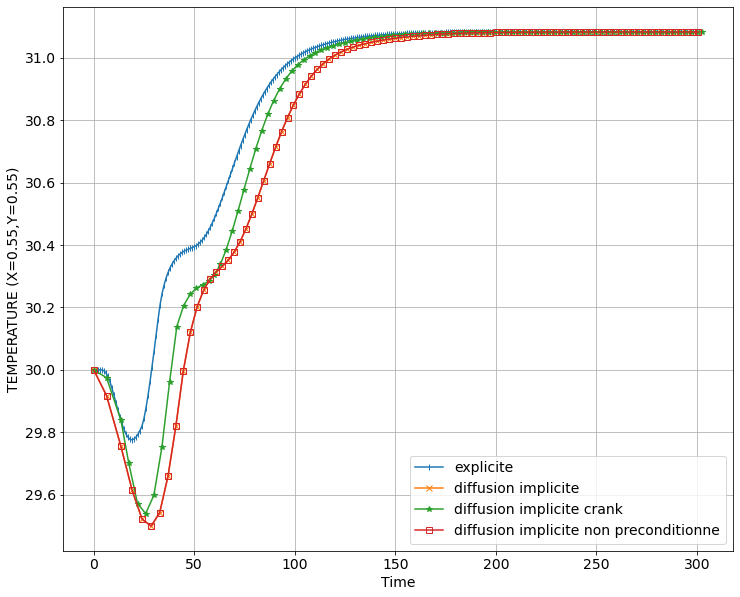

In [3]:
from trustutils import plot

Graphique=plot.Graph("")
Graphique.addPoint("./VDF_expl_SONDE_TFLU.son",label="explicite",marker='-|')
Graphique.addPoint("./VDF_diff_impl_SONDE_TFLU.son",label="diffusion implicite",marker='-x')
Graphique.addPoint("./VDF_crank_SONDE_TFLU.son",label="diffusion implicite crank",marker='-*')
Graphique.addPoint("./VDF_diff_impl_non_precond_SONDE_TFLU.son",label="diffusion implicite non preconditionne",marker='-s',mfc='none')
Graphique.visu()

## Evolution de la temperature en (0.55,0.55) en VEF 
###
les 4 courbes vont elles vers la meme solution ?\
Remarque le non precond fait moins d’iterations

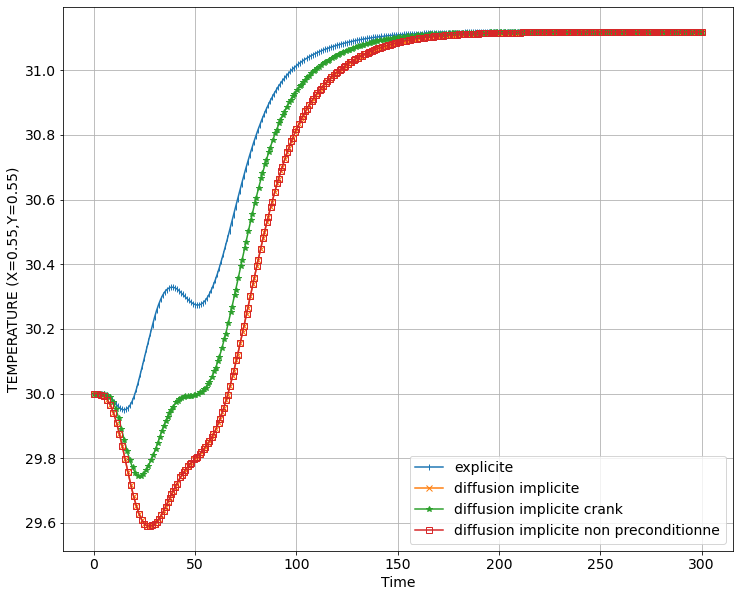

In [4]:
Graphique=plot.Graph("")
Graphique.addPoint("./VEF_expl_SONDE_TFLU.son",label="explicite",marker='-|')
Graphique.addPoint("./VEF_diff_impl_SONDE_TFLU.son",label="diffusion implicite",marker='-x')
Graphique.addPoint("./VEF_crank_SONDE_TFLU.son",label="diffusion implicite crank",marker='-*')
Graphique.addPoint("./VEF_diff_impl_non_precond_SONDE_TFLU.son",label="diffusion implicite non preconditionne",marker='-s',mfc='none')
Graphique.visu()

## Cas de conduction analytique
solution of the problem :  $T(x,t)=x \cdot t$

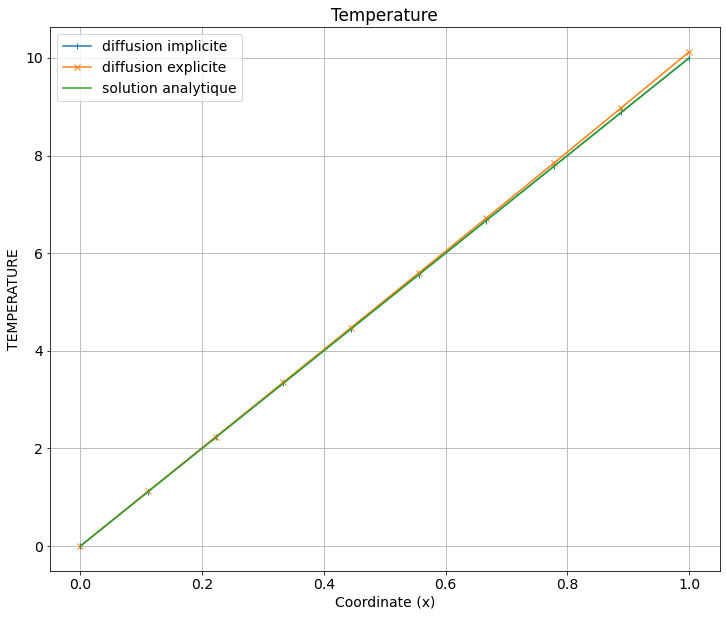

In [5]:
import numpy as np

Graphique=plot.Graph("Temperature") 
Graphique.addSegment("./solide_SONDE_TSOL.son",label="diffusion implicite",marker="-|")
Graphique.addSegment("./solide_explicite_SONDE_TSOL.son",label="diffusion explicite",marker="-x")
x=np.linspace(0,1,300)
y=10*x
Graphique.add(x,y,label="solution analytique")
Graphique.visu()

## Computer performance

In [6]:
run.tablePerf()

,host,system,Total CPU Time,CPU time/step,number of cells
./VDF_expl,is244522,Linux,0.107756,0.000326907,51-49
./VDF_diff_impl,is244522,Linux,0.100694,0.000942979,51-49
./VDF_crank,is244522,Linux,0.094787,0.000875732,51-49
./VDF_diff_impl_non_precond,is244522,Linux,0.095081,0.000907526,51-49
./VEF_expl,is244522,Linux,1.807070,0.000373169,204-196
./VEF_diff_impl,is244522,Linux,0.699619,0.00155963,204-196
./VEF_crank,is244522,Linux,0.610806,0.00135081,204-196
./VEF_diff_impl_non_precond,is244522,Linux,0.638149,0.0014245,204-196
./solide,is244522,Linux,0.004004,0.001061,80
./solide_explicite,is244522,Linux,0.018256,7.73106e-05,80
